### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set() # For getting all visualization in seaborn style
%matplotlib inline

### Importing Data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# EDA

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

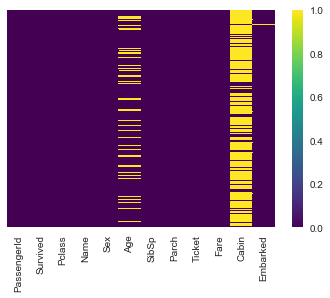

In [5]:
sns.heatmap(train_data.isnull(), cmap='viridis', yticklabels=False)

Later we will handling the missing values of these two features

## Univariate Analysis of  dependent variable ( Survived )

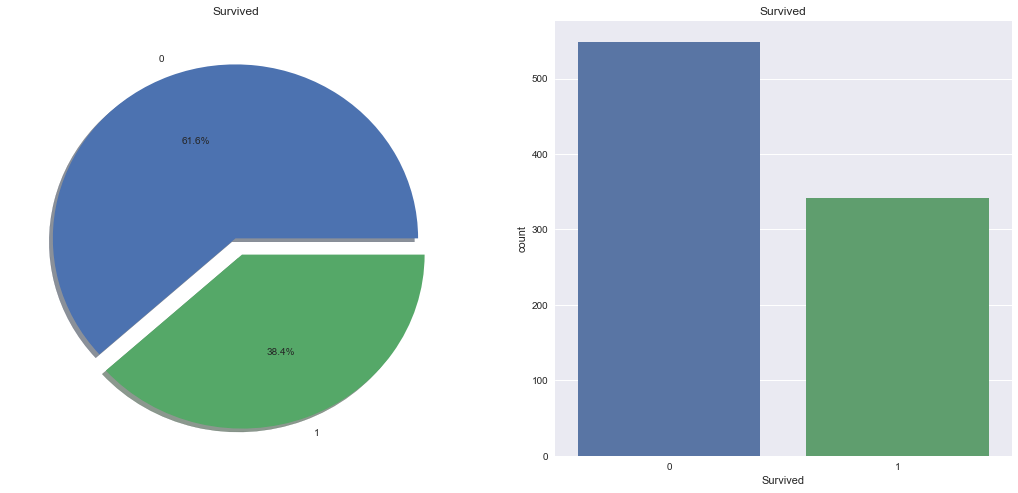

In [6]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
train_data['Survived'].value_counts().plot.pie(explode=[0,0.1], ax=ax[0], shadow=True, autopct='%1.1f%%')
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(data=train_data,x='Survived' , ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## Bivariate Analysis of Independent Variables

In [7]:
# SEX FEATURE 
train_data.groupby(by=['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

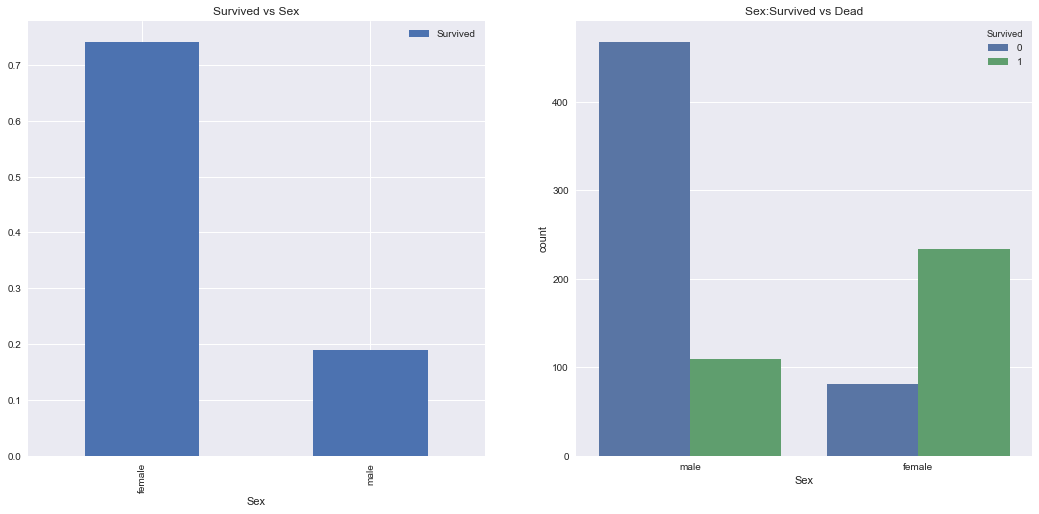

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
train_data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=train_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [9]:
# PClass Feature
pd.crosstab(train_data['Pclass'], train_data['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


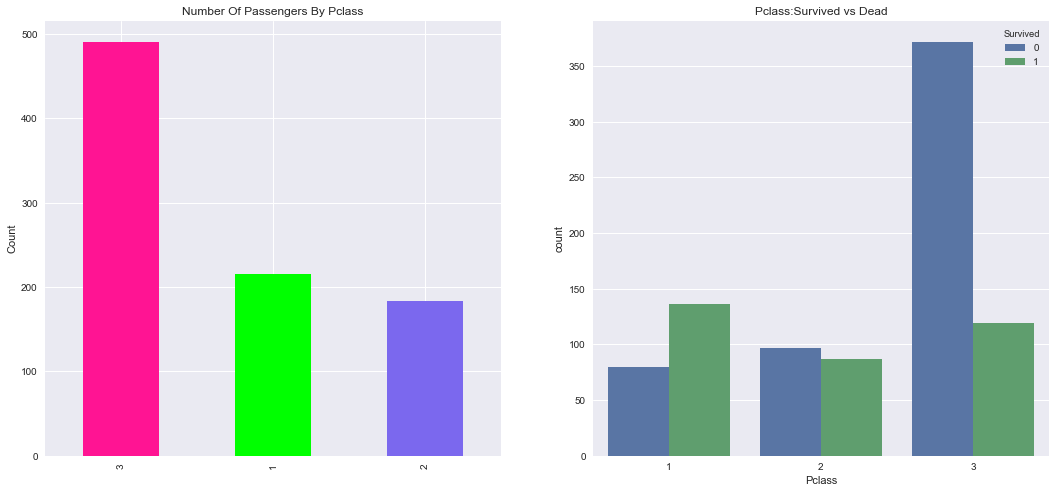

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
train_data['Pclass'].value_counts().plot.bar(color=['#FF1493','#00FF00','#7B68EE'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=train_data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

That's so trajedic.. Always money matters...

In [11]:
pd.crosstab([train_data['Sex'], train_data['Survived']],train_data['Pclass'],
            margins=True).style.background_gradient(cmap='summer_r')

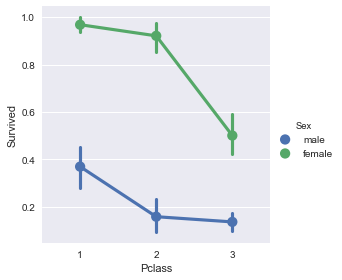

In [12]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train_data)
plt.show()

Survival percentage of women in Pclass 1 is so high and only 3 female person of this class died out of 94 !!

In [13]:
# Age Feature
print("Oldest Passengers: ", train_data['Age'].max())
print("Youngest Passengers: ", train_data['Age'].min())
print("Average age of the Passengers", train_data['Age'].mean())

Oldest Passengers:  80.0
Youngest Passengers:  0.42
Average age of the Passengers 29.69911764705882


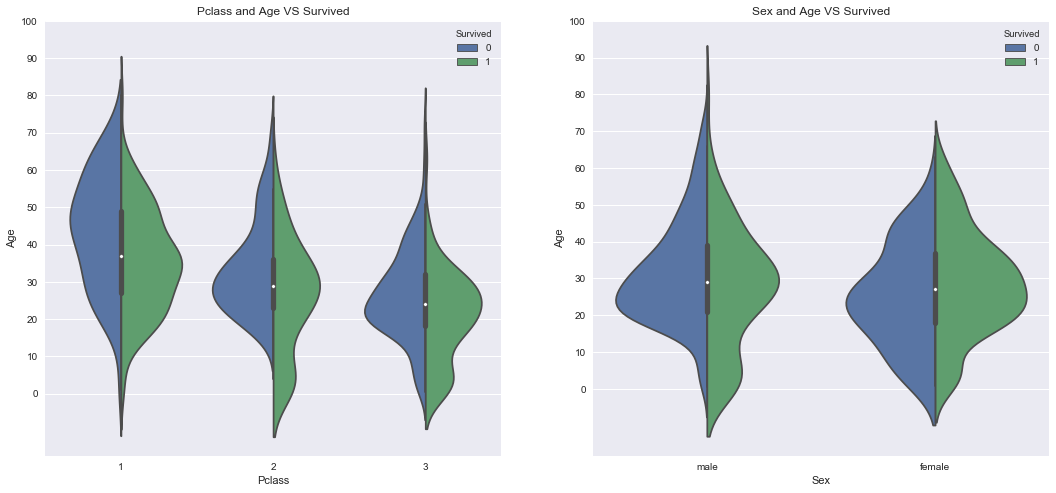

In [14]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=train_data, split=True, ax=ax[0])
ax[0].set_title("Pclass and Age VS Survived")
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex', 'Age', hue='Survived', data=train_data, split=True, ax=ax[1])
ax[1].set_title("Sex and Age VS Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

As shown above the survival chance for age between 20 and 50 is high even better for females

The Age feature has 177 null values to replace these NaN values, we can assign them the mean age of the dataset.
But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age.so we are gonna check the name feature and check for each salutation.


In [15]:
# Extracting the Salutation
train_data['Salutation'] = 0
for i in train_data:
    train_data['Salutation'] = train_data['Name'].str.extract('([a-zA-Z]+)\.')

In [16]:
train_data['Salutation'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Salutation, dtype: object

In [17]:
pd.crosstab(train_data['Salutation'],train_data['Sex']).T.style.background_gradient(cmap='summer_r')

Salutation,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [18]:
train_data['Salutation'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [19]:
train_data.groupby('Salutation')['Age'].mean()

Salutation
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [20]:
# Replacing nan values with suitable value for each category
train_data.loc[(train_data.Age.isnull())&(train_data.Salutation=='Mr'), 'Age']=33
train_data.loc[(train_data.Age.isnull())&(train_data.Salutation=='Mrs'), 'Age']=36
train_data.loc[(train_data.Age.isnull())&(train_data.Salutation=='Master'), 'Age']=5
train_data.loc[(train_data.Age.isnull())&(train_data.Salutation=='Miss'), 'Age']=22
train_data.loc[(train_data.Age.isnull())&(train_data.Salutation=='Other'), 'Age']=46

In [21]:
train_data.Age.isnull().sum() # or use .any() to get False value

0

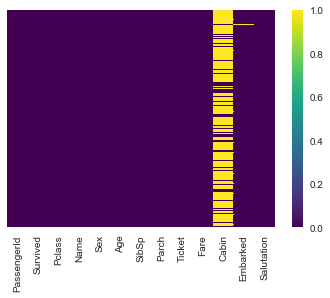

In [22]:
sns.heatmap(train_data.isnull(), cmap='viridis', yticklabels=False)

Ok we have no null value in Age anymore

In [23]:
# Embarked Feature
pd.crosstab([train_data.Embarked, train_data.Pclass], [train_data.Sex, train_data.Survived],
              margins=True).style.background_gradient(cmap='summer_r')

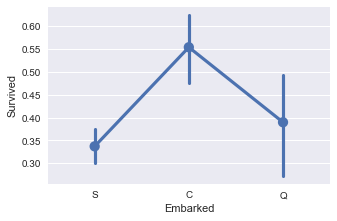

In [24]:
sns.factorplot('Embarked', 'Survived', data=train_data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S

Text(0.5,1,'Embarked vs Pclass')

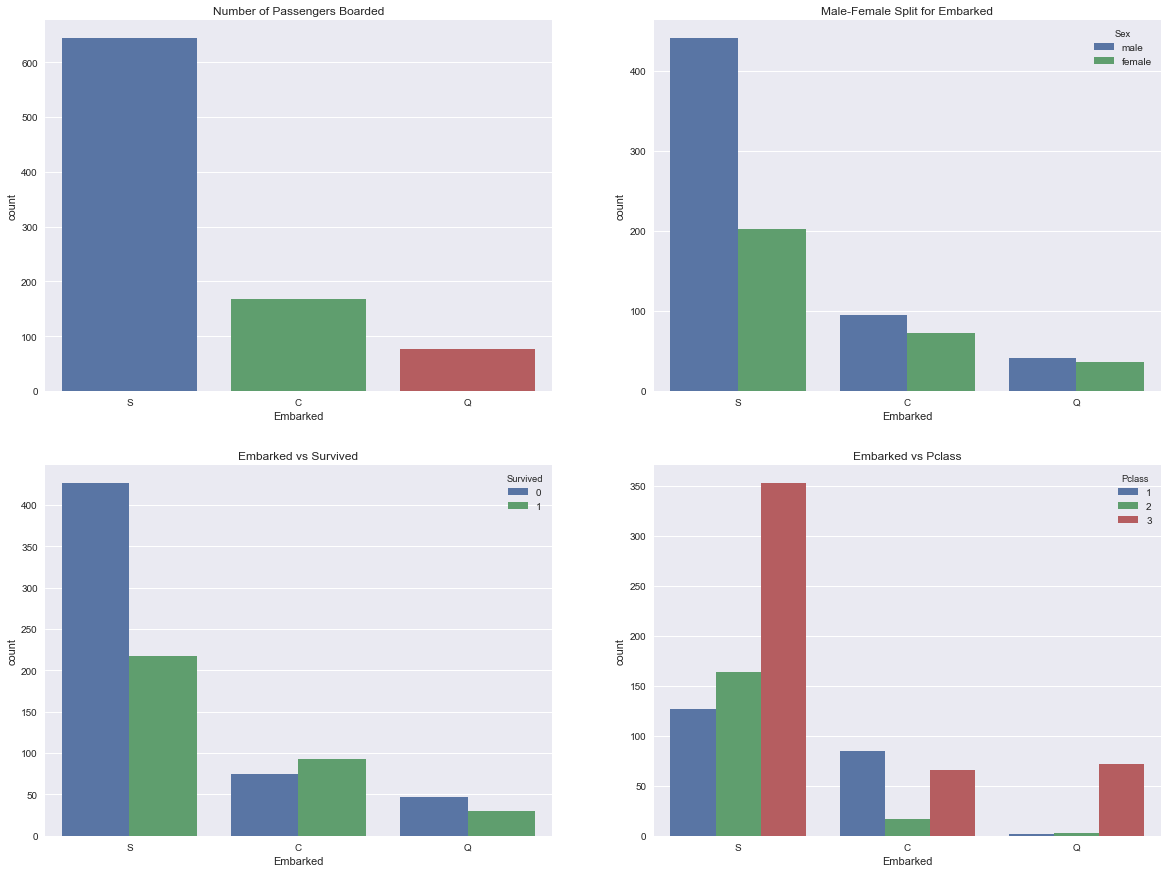

In [25]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=train_data, ax=ax[0, 0])
ax[0, 0].set_title('Number of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=train_data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=train_data, ax=ax[1,0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=train_data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

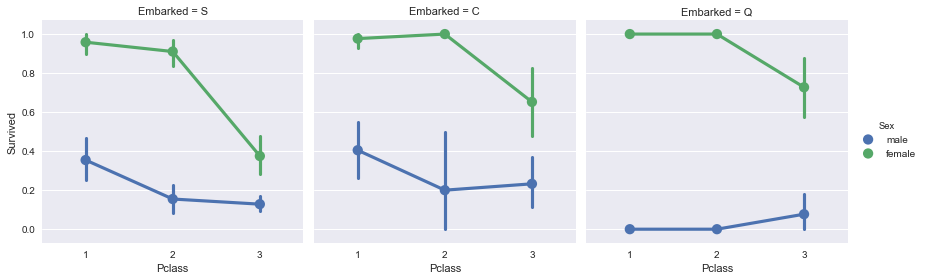

In [26]:
sns.factorplot('Pclass', 'Survived', data=train_data, col='Embarked', hue='Sex')
plt.show()

In [27]:
train_data['Embarked'].fillna('S', inplace=True)

In [28]:
train_data.Embarked.isnull().any()

False

In [29]:
# SibSp Feature
pd.crosstab([train_data.SibSp], train_data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


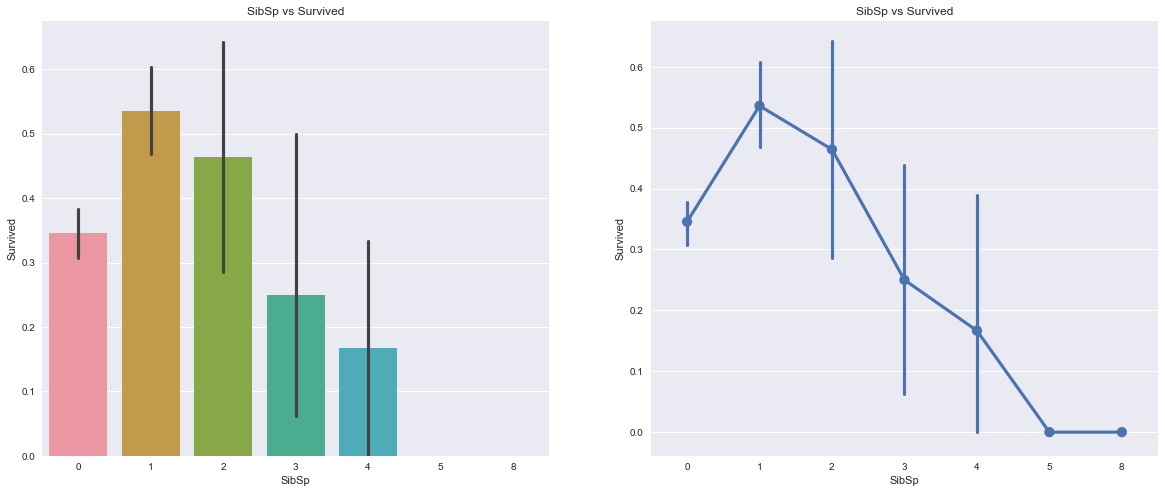

In [30]:
f, ax = plt.subplots(1, 2, figsize=(20,8))
sns.barplot('SibSp', 'Survived', data=train_data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data=train_data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [31]:
pd.crosstab(train_data.SibSp, train_data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Unfortunately people with more than 3 family members were all in Pclass=3 that most of them died

In [32]:
# Parch Feature

pd.crosstab(train_data.Parch, train_data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Larger families were in Pclass: 3

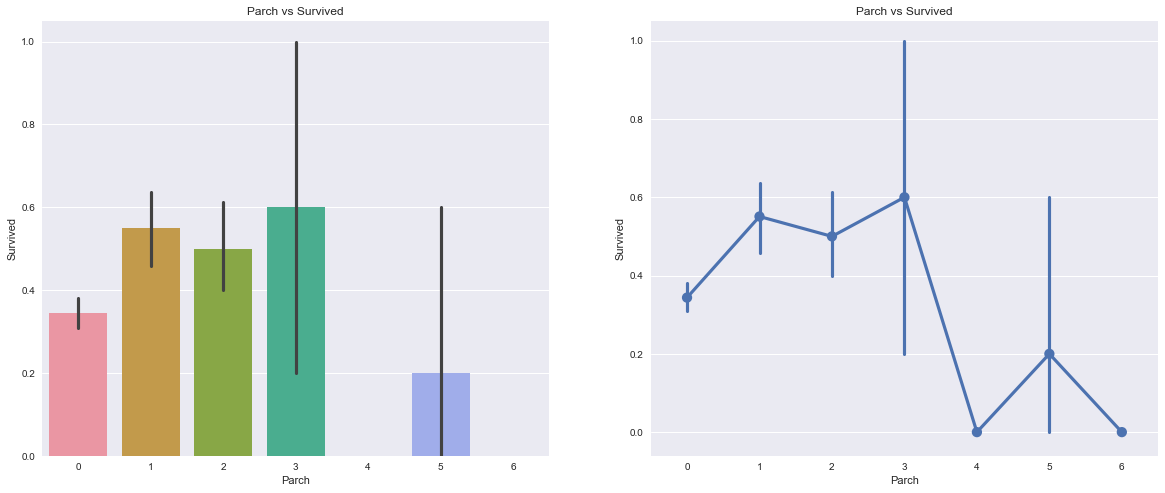

In [33]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch', 'Survived', data=train_data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=train_data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

In [34]:
print('Highest Fare was:',train_data['Fare'].max())
print('Lowest Fare was:',train_data['Fare'].min())
print('Average Fare was:',train_data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


/home/sparda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/sparda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/sparda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


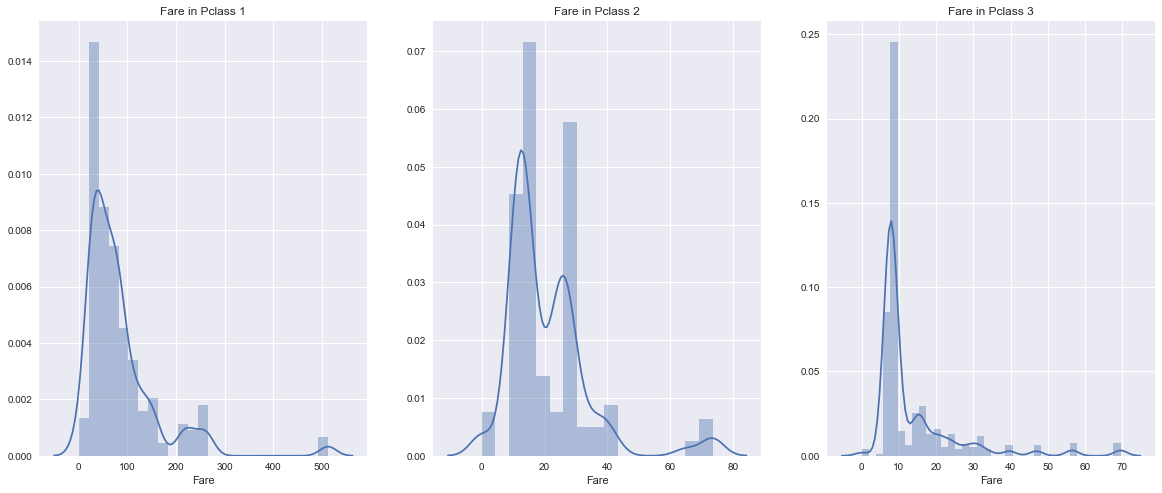

In [35]:
f, ax = plt.subplots(1, 3, figsize=(20,8))
sns.distplot(train_data[train_data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fare in Pclass 1')
sns.distplot(train_data[train_data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fare in Pclass 2')
sns.distplot(train_data[train_data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fare in Pclass 3')
plt.show()

### Features Correlation

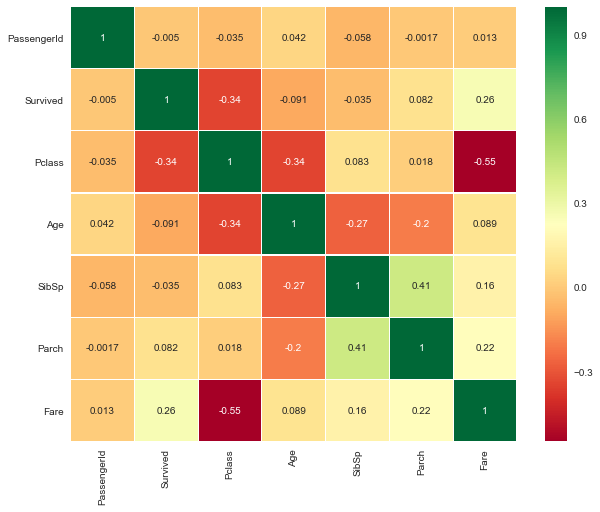

In [36]:
sns.heatmap(train_data.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

Only Parch and SibSp are 41 percent correlated.. Not that much.. So we have no multicollinearity then we can use all features

## Feature Engineering and Data Cleaning

In [37]:
# Create new feature: Age_band for converting continious age values to descrete bands
train_data['Age_band']=0
train_data.loc[train_data['Age']<=16,'Age_band']=0
train_data.loc[(train_data['Age']>16)&(train_data['Age']<=32),'Age_band']=1
train_data.loc[(train_data['Age']>32)&(train_data['Age']<=48),'Age_band']=2
train_data.loc[(train_data['Age']>48)&(train_data['Age']<=64),'Age_band']=3
train_data.loc[train_data['Age']>64,'Age_band']=4
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [38]:
# Number of passenger in each band
train_data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


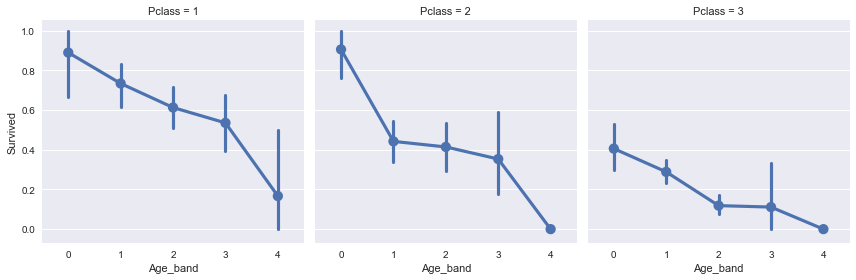

In [39]:
sns.factorplot('Age_band', 'Survived', data=train_data, col='Pclass')
plt.show()

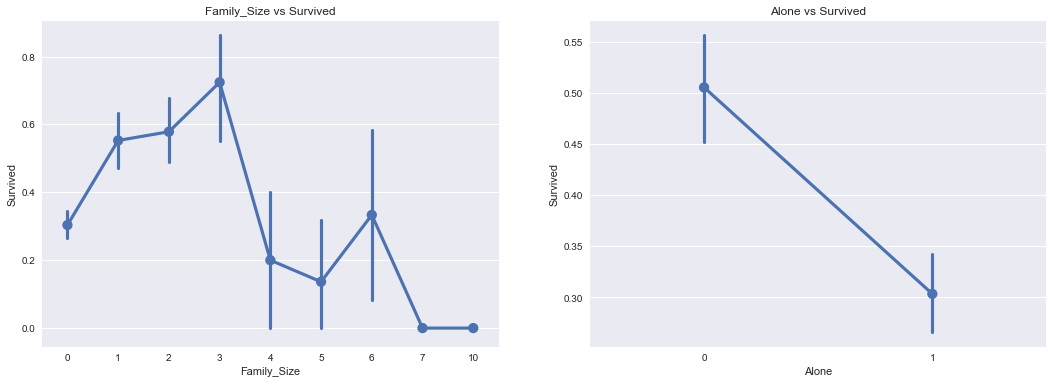

In [40]:
# Create two feature: Family_size & alone
train_data['Family_Size']=0
train_data['Family_Size'] = train_data['Parch'] + train_data['SibSp']
train_data['Alone']=0
train_data.loc[train_data['Family_Size']==0, 'Alone']=1

f, ax = plt.subplots(1, 2, figsize=(18,6))
sns.factorplot('Family_Size', 'Survived', data=train_data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data=train_data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

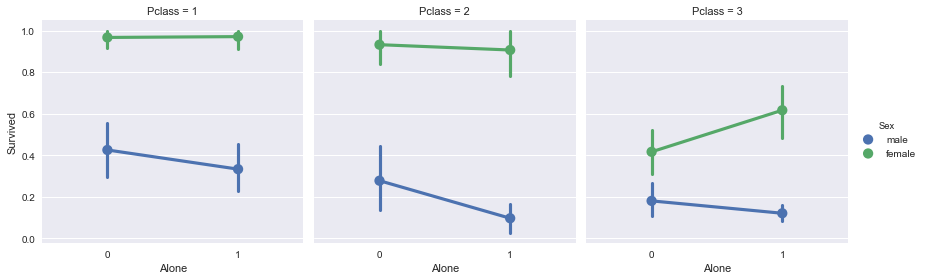

In [41]:
sns.factorplot('Alone', 'Survived', hue='Sex', col='Pclass', data=train_data)
plt.show()

In [42]:
train_data['Fare_Range']=pd.qcut(train_data['Fare'],4)
train_data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


fare_range increases, the chances of survival increases.

In [43]:
# We are gonna categorizing the fare_range
train_data['Fare_cat']=0
train_data.loc[train_data['Fare']<=7.91,'Fare_cat']=0
train_data.loc[(train_data['Fare']>7.91)&(train_data['Fare']<=14.454),'Fare_cat']=1
train_data.loc[(train_data['Fare']>14.454)&(train_data['Fare']<=31),'Fare_cat']=2
train_data.loc[(train_data['Fare']>31)&(train_data['Fare']<=513),'Fare_cat']=3

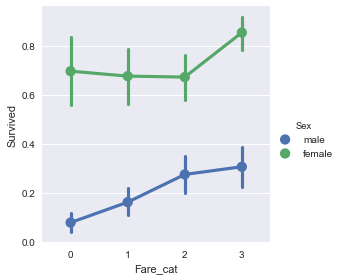

In [44]:
sns.factorplot('Fare_cat', 'Survived', hue='Sex', data=train_data)
plt.show()

## Handling Categorical Features

In [45]:
train_data['Sex'].replace(['male','female'],[0,1],inplace=True)
train_data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train_data['Salutation'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [46]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.91, 14.454]",1


### we should make dummy variables from them and avoiding to dummy trap but we leave it to another time

In [47]:
# Drop unused features
train_data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

In [48]:
train_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Salutation,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


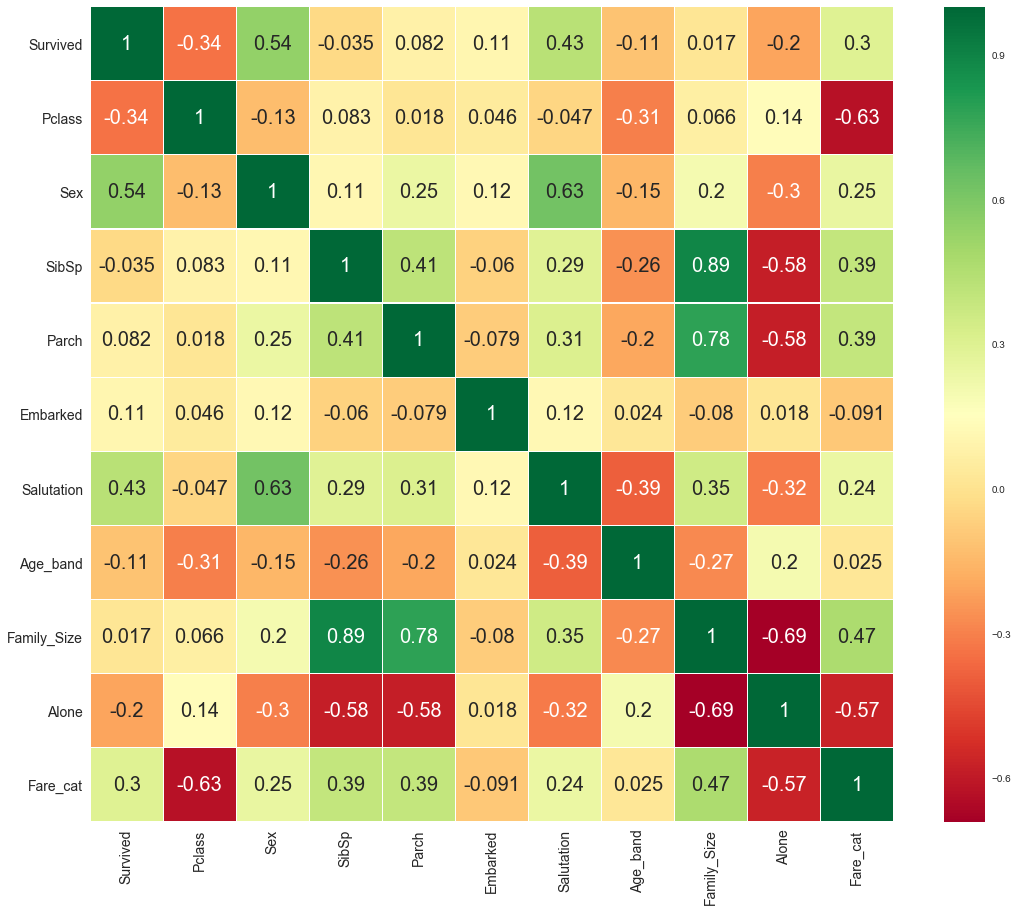

In [49]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Predictive Modeling

In [50]:
from sklearn.model_selection import train_test_split

In [54]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [55]:
X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Salutation,Age_band,Family_Size,Alone,Fare_cat
0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,0,1,1,2,1,0,3
2,3,1,0,0,0,2,1,0,1,1
3,1,1,1,0,0,1,2,1,0,3
4,3,0,0,0,0,0,2,0,1,1


In [56]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [59]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix 

## rbf-SVM

In [60]:
model=svm.SVC(kernel='rbf')
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,y_test))

Accuracy for rbf SVM is  0.8171641791044776


## Linear SVM

In [61]:
model=svm.SVC(kernel='linear')
model.fit(X_train,y_train)
prediction2=model.predict(X_test)
print('Accuracy for Linear SVM is ',metrics.accuracy_score(prediction2,y_test))

Accuracy for Linear SVM is  0.7985074626865671


## Logistic Regression

In [62]:
model=LogisticRegression()
model.fit(X_train,y_train)
prediction3=model.predict(X_test)
print('Accuracy for Logistic Regression is ',metrics.accuracy_score(prediction3,y_test))

Accuracy for Logistic Regression is  0.7985074626865671


## Decision Tree

In [64]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction4=model.predict(X_test)
print('Accuracy for Decision Tree is ',metrics.accuracy_score(prediction4,y_test))

Accuracy for Decision Tree is  0.835820895522388


## KNN

In [65]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)
prediction5=model.predict(X_test)
print('Accuracy for KNN is ',metrics.accuracy_score(prediction5,y_test))

Accuracy for KNN is  0.8022388059701493


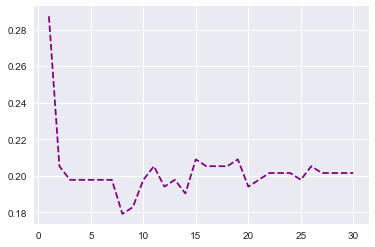

In [66]:
# Tune KNN with elbow method
error_rate = []
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_test!=pred_i))

plt.plot(range(1,31), error_rate, color='purple', linestyle='dashed')
plt.show()

In [70]:
tuned_knn = KNeighborsClassifier(n_neighbors=8)
tuned_knn.fit(X_train,y_train)
tuned_knn_pred = tuned_knn.predict(X_test)
print('Accuracy for tuned-KNN is ',metrics.accuracy_score(tuned_knn_pred,y_test))

Accuracy for tuned-KNN is  0.8208955223880597


## Gaussian Naive Bayes

In [71]:
model=GaussianNB()
model.fit(X_train,y_train)
prediction6=model.predict(X_test)
print('Accuracy for GNB is ',metrics.accuracy_score(prediction6,y_test))

Accuracy for GNB is  0.7910447761194029


In [75]:
model=RandomForestClassifier(n_estimators=200)
model.fit(X_train,y_train)
prediction7=model.predict(X_test)
print('Accuracy for RFC is ',metrics.accuracy_score(prediction7,y_test))

Accuracy for RFC is  0.835820895522388


# Cross Validation

In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

In [77]:
kfold = KFold(n_splits=10, random_state=0)

In [79]:
cv_mean=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=8),
        DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=200)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    cv_mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe=pd.DataFrame({'CV Mean':cv_mean,'Std':std},index=classifiers)       
new_models_dataframe

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.811511,0.036080
Decision Tree,0.807004,0.029701
Naive Bayes,0.801386,0.028999
Random Forest,0.812609,0.029445


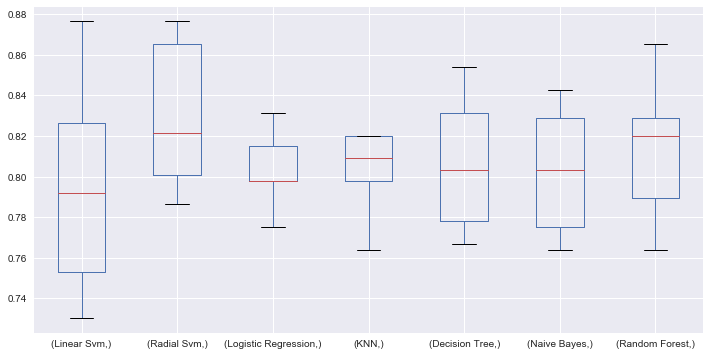

In [80]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

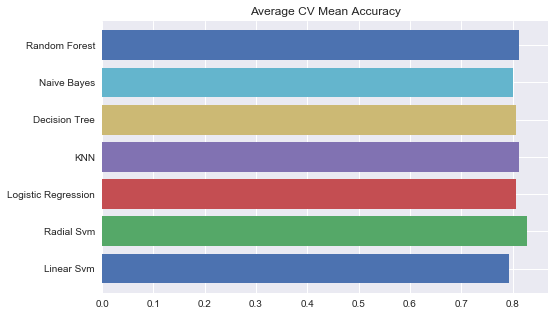

In [87]:
new_models_dataframe['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

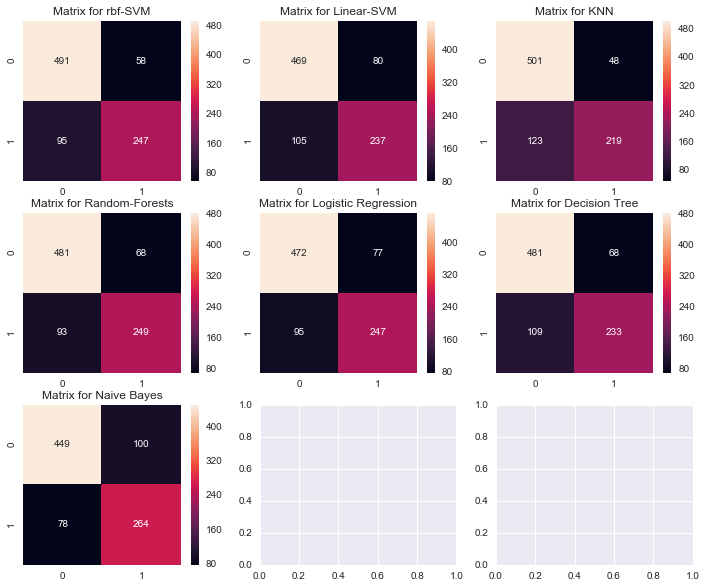

In [92]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=8),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=200),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

## Tuning SVM with Grid-Search

In [94]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
0.8282504012841091
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    8.7s finished


## Tuning Random Forest

In [95]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.7961476725521669
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   24.0s finished


# Ensembling

## Voting Classifier

In [97]:
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=8)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.2)),
                                              ('RFor',RandomForestClassifier(n_estimators=100,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(X_train,y_train)

print('The accuracy for ensembled model is:',ensemble.score(X_test,y_test))
cross=cross_val_score(ensemble,X,y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8097014925373134
The cross validated score is 0.8249148791283624


## Bagging

In [98]:
# Bagged KNN
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=8),random_state=0,n_estimators=700)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,y_test))
result=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.7985074626865671
The cross validated score for bagged KNN is: 0.8126293837248892


In [99]:
# Bagged Decision Tree
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,y_test))
result=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8544776119402985
The cross validated score for bagged Decision Tree is: 0.8204826353421859


## Boosting

In [100]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249526160481218


In [102]:
# Stochastic Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8182862331176939


In [103]:
# XGBoost
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8104710021563954


In [104]:
# Hyper-Parameter Tuning for AdaBoost
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  6.4min finished


0.8316498316498316
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None)


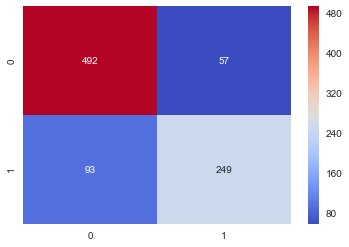

In [105]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,y,cv=10)
sns.heatmap(confusion_matrix(y,result),cmap='coolwarm',annot=True,fmt='2.0f')
plt.show()

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y,result))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87       549
          1       0.81      0.73      0.77       342

avg / total       0.83      0.83      0.83       891



### Consider we splitted the train-set for both train and test , Using more data make better results